C:\Users\jorda\AppData\Local\Temp\ipykernel_20288\3485699382.py:3: DeprecationWarning: `scipy.interpolate.polyint.factorial` is deprecated along with the `scipy.interpolate.polyint` namespace. `scipy.interpolate.polyint.factorial` will be removed in SciPy 1.14.0, and the `scipy.interpolate.polyint` namespace will be removed in SciPy 2.0.0.
  from scipy.interpolate.polyint import factorial
'rm' is not recognized as an internal or external command,
operable program or batch file.


sum of the counts= 27159.0
counts average n= 10.86
less counts average n= 11.46
counts standard deviation:  3.24
less counts standard deviation:  3.21


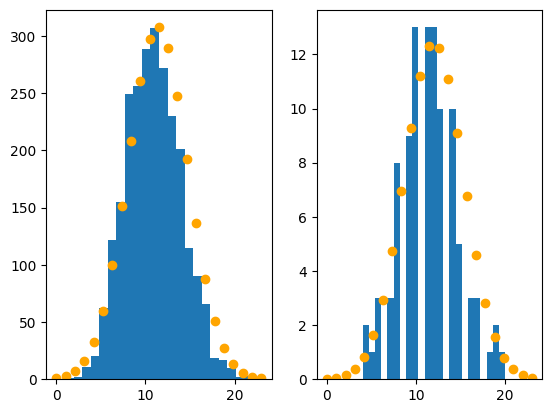

In [1]:
import math
import statistics as stat
from scipy.interpolate.polyint import factorial
import matplotlib.pyplot as plt
import numpy as np

# function to get data out of tsv file
def parse_string(string):
    length = len(string)
    for j in range(2):
        loc = string.find('	')
        string = string[loc + 1:length]
    loc = string.find('	')
    string = string[0:loc]
    return int(string)


# writes the counts in the tsv file to an array
lines = []
# open the file
f = open("counts.tsv", "r")
for x in f:
    lines.append(x)
# closes the file
f.close()
!rm counts.tsv #delete file from google colab

# initialize the counts and less_counts lists
counts = []
less_counts = []

# add data from each line of counts.txt to the counts list
for i in range(11, len(lines)):
    counts.append(parse_string(lines[i]))
# print(counts)

# save the first 100 elements of counts as the list less_counts
less_counts_len = 100
less_counts.extend(counts[0:less_counts_len])


# find the sum of the counts
countsAverage = math.fsum(counts)
less_countsAverage = math.fsum(less_counts)
print("sum of the counts=", countsAverage)

# find the average of the counts
countsAverage = countsAverage / len(counts)
less_countsAverage = less_countsAverage / len(less_counts)
print("counts average n=", round(countsAverage, 2))
print("less counts average n=", round(less_countsAverage, 2))

countsSTDev = stat.stdev(counts)
less_countsSTDev = stat.stdev(less_counts)
print("counts standard deviation: ", round(countsSTDev, 2))
print("less counts standard deviation: ", round(less_countsSTDev, 2))

# use the average n to find the Gauss distribution
countsGauss = []
less_countsGauss = []


# determine maximum number of counts in
nbins = 0
for i in range(0, len(counts)):
    if counts[i] > nbins:
        nbins = counts[i]

#calculate the Gauss frequency distributions
for i in range(0, nbins):
    countsGauss.append(1/(countsSTDev*math.sqrt(2*np.pi))* math.e **(-(i - countsAverage)**2 / (2 * countsSTDev ** 2)) * len(counts))
    less_countsGauss.append(1/(less_countsSTDev*math.sqrt(2*np.pi))* math.e **(-(i - less_countsAverage)**2 / (2 * less_countsSTDev ** 2)) * less_counts_len)

# plot Gauss distribution with average n
xValues = np.linspace(0, nbins, nbins)

fig, (plt1, plt2) = plt.subplots(1, 2)
plt1.scatter(xValues, countsGauss, color="orange", zorder = 2)
plt2.scatter(xValues, less_countsGauss, color = "orange", zorder = 2)

# plot the counts array as a histogram (counts the number of times there are 5 counts in the 1000 1 s intervals of data for example)
plt1.hist(counts, nbins, zorder = 1)
plt2.hist(less_counts, nbins, zorder = 1)
plt.show()


